# Lab 6

In [19]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
bkgd_dict1 = pickle.load(infile)

# list all keys of the files
bkgd_dict1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [20]:
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
sig_dict1 = pickle.load(infile)
sig_dict1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [21]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson

In [22]:
bkgd = poisson(100)

## Problem 1

In [23]:
sigma5 = 1/3.5e6
det = bkgd.ppf(1-sigma5)
det

154.0

Above calculation shows that the 5-sigma detection has a threshold at 154 for the poission distribution backgound with mean of 100.
## Problem 2
#### a)

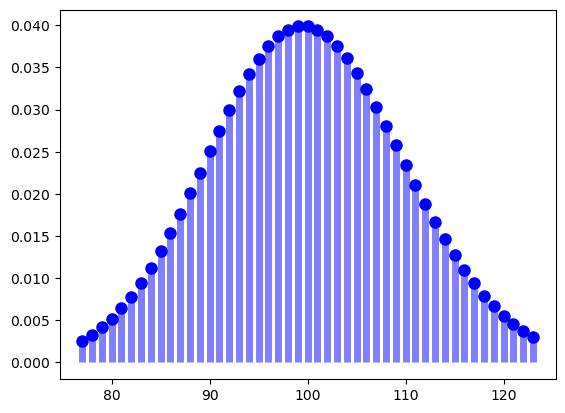

In [24]:
fig, ax = plt.subplots(1, 1)
mu = 100
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, bkgd.pmf(x), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, bkgd.pmf(x), colors='b', lw=5, alpha=0.5)
plt.show()

In [28]:
prob = bkgd.cdf(193)
ppf = stats.norm.ppf(prob)
print(ppf)

8.209536151601387


From above calculation, the background distribution has 8 sigma at around 190. Therefore, we decided to insert data there.

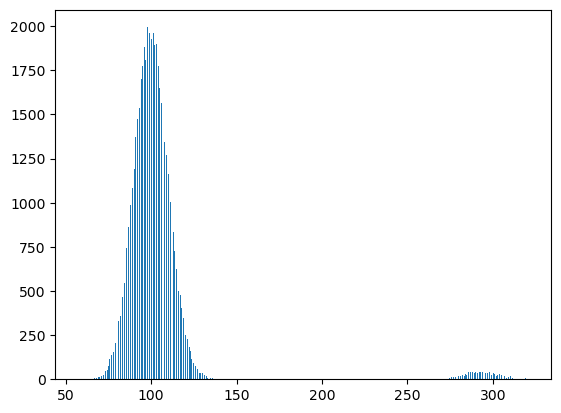

In [38]:
dist = np.random.poisson(100,50000)
bkgd_insert = dist.copy()
for i in range(1000):
    bkgd_insert[i] = dist[i] + 193
fig, ax = plt.subplots(1, 1)
ax.hist(bkgd_insert, bins = 500)
plt.show()

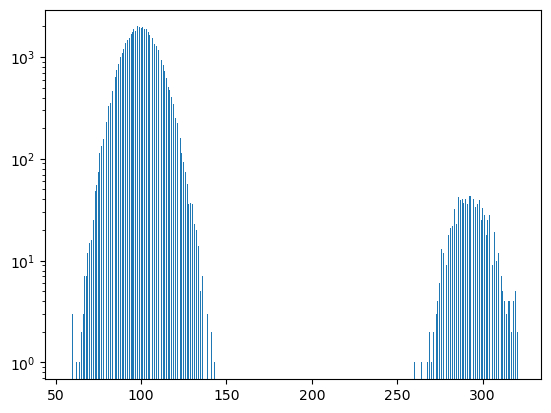

In [39]:
fig, ax = plt.subplots(1, 1)
ax.hist(bkgd_insert, bins = 500)
plt.yscale('log')
plt.show()

The histogram shows that the injected signals form a small distribution shifted to the right of the original main distribution. 
Because we injected the signal for 1000 times, in comparison to our original 50000 signals, we would expect the brightness of injected distribution to be 1/50 to our original one.
#### b)
From the log plot we can see the shape of the signals better which almost all are upside-down parabola. This means the distributions look like normal distribution. It is obvious biased and non-symmetric.
## Problem 3
#### a)

In [44]:
vals = []
for i in range(0,10000):
    vals.append(np.random.randint(0,high=300))
bkgd_inj = []
for i in range(0,10000):
    newDistVal=dist[i]+vals[i]
    bkgd_inj.append(newDistVal)

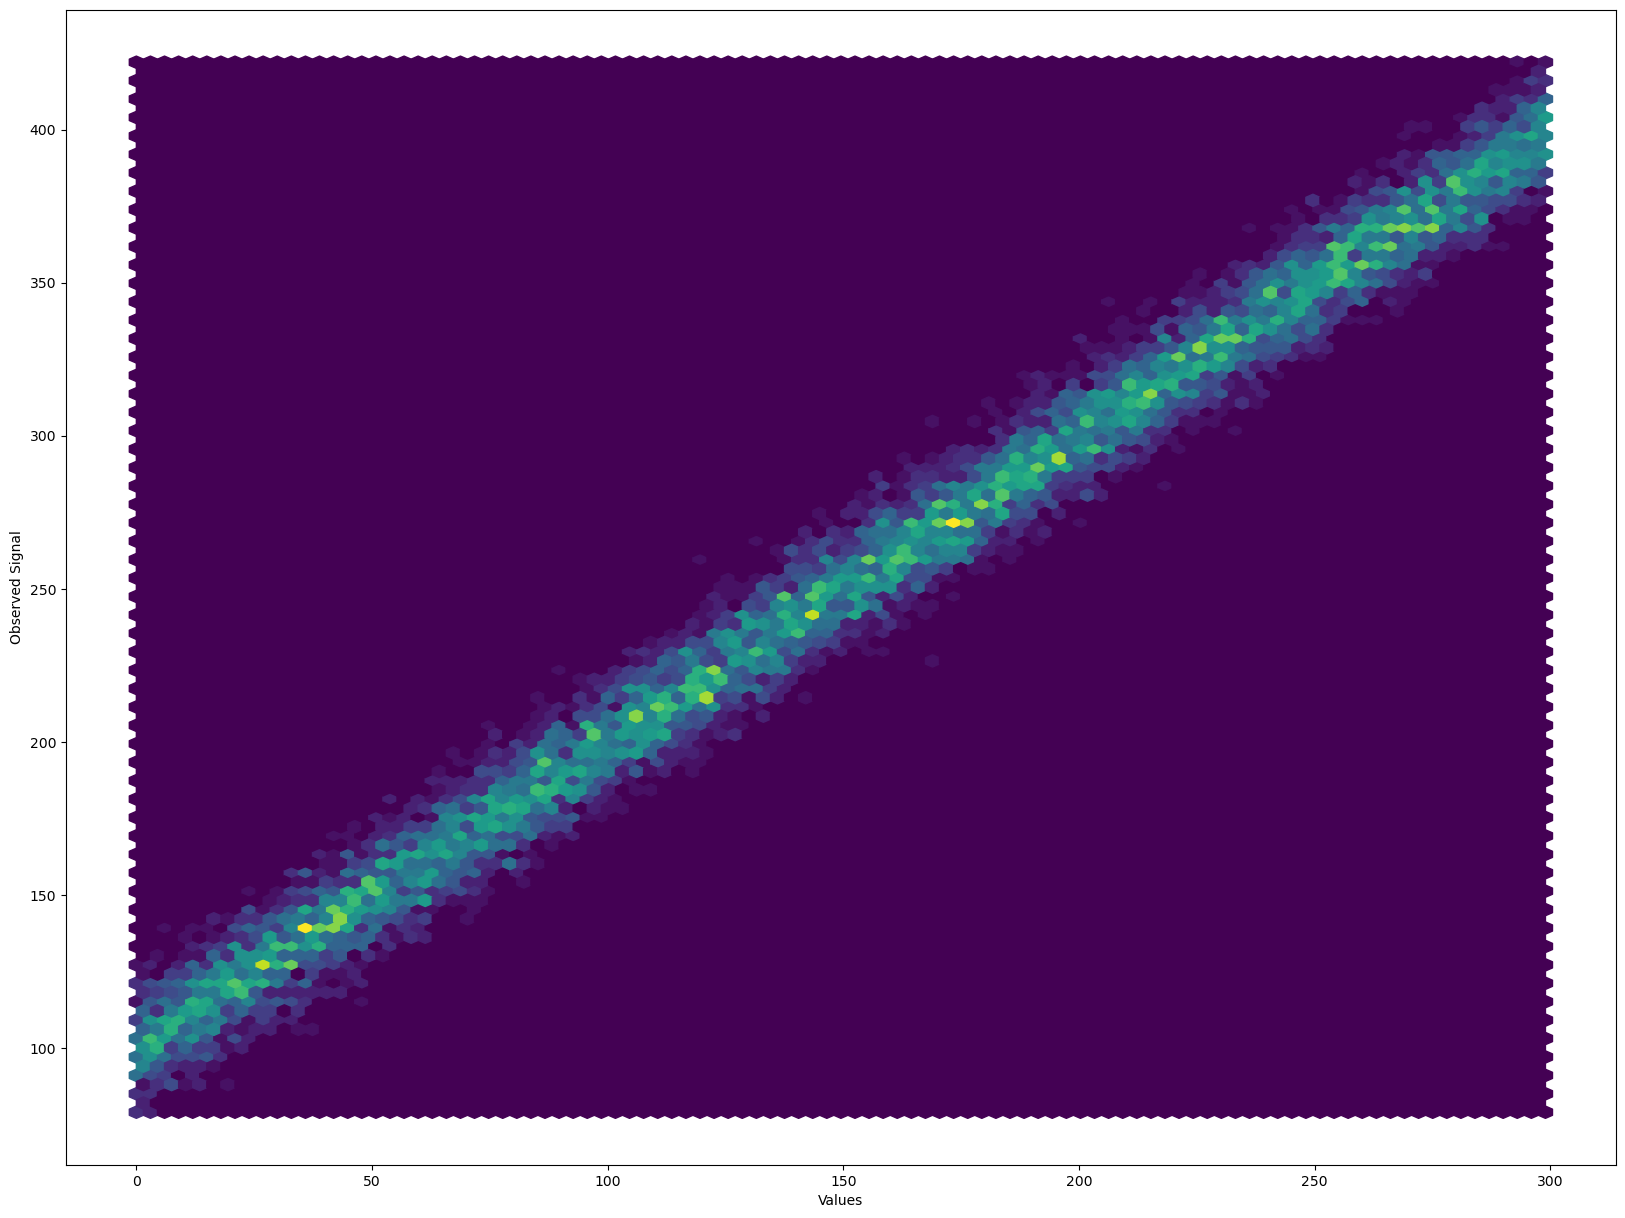

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
plt.hexbin(vals,bkgd_inj)
plt.xlabel("Values")
plt.ylabel("Observed Signal")
plt.show()

We are simulating the injection of signals with range of 0 to 300 for 10000 times. The resulting graph appears to be a line which allows us to use it to find either the observed signals or the injected values when knowing the other.
#### b)

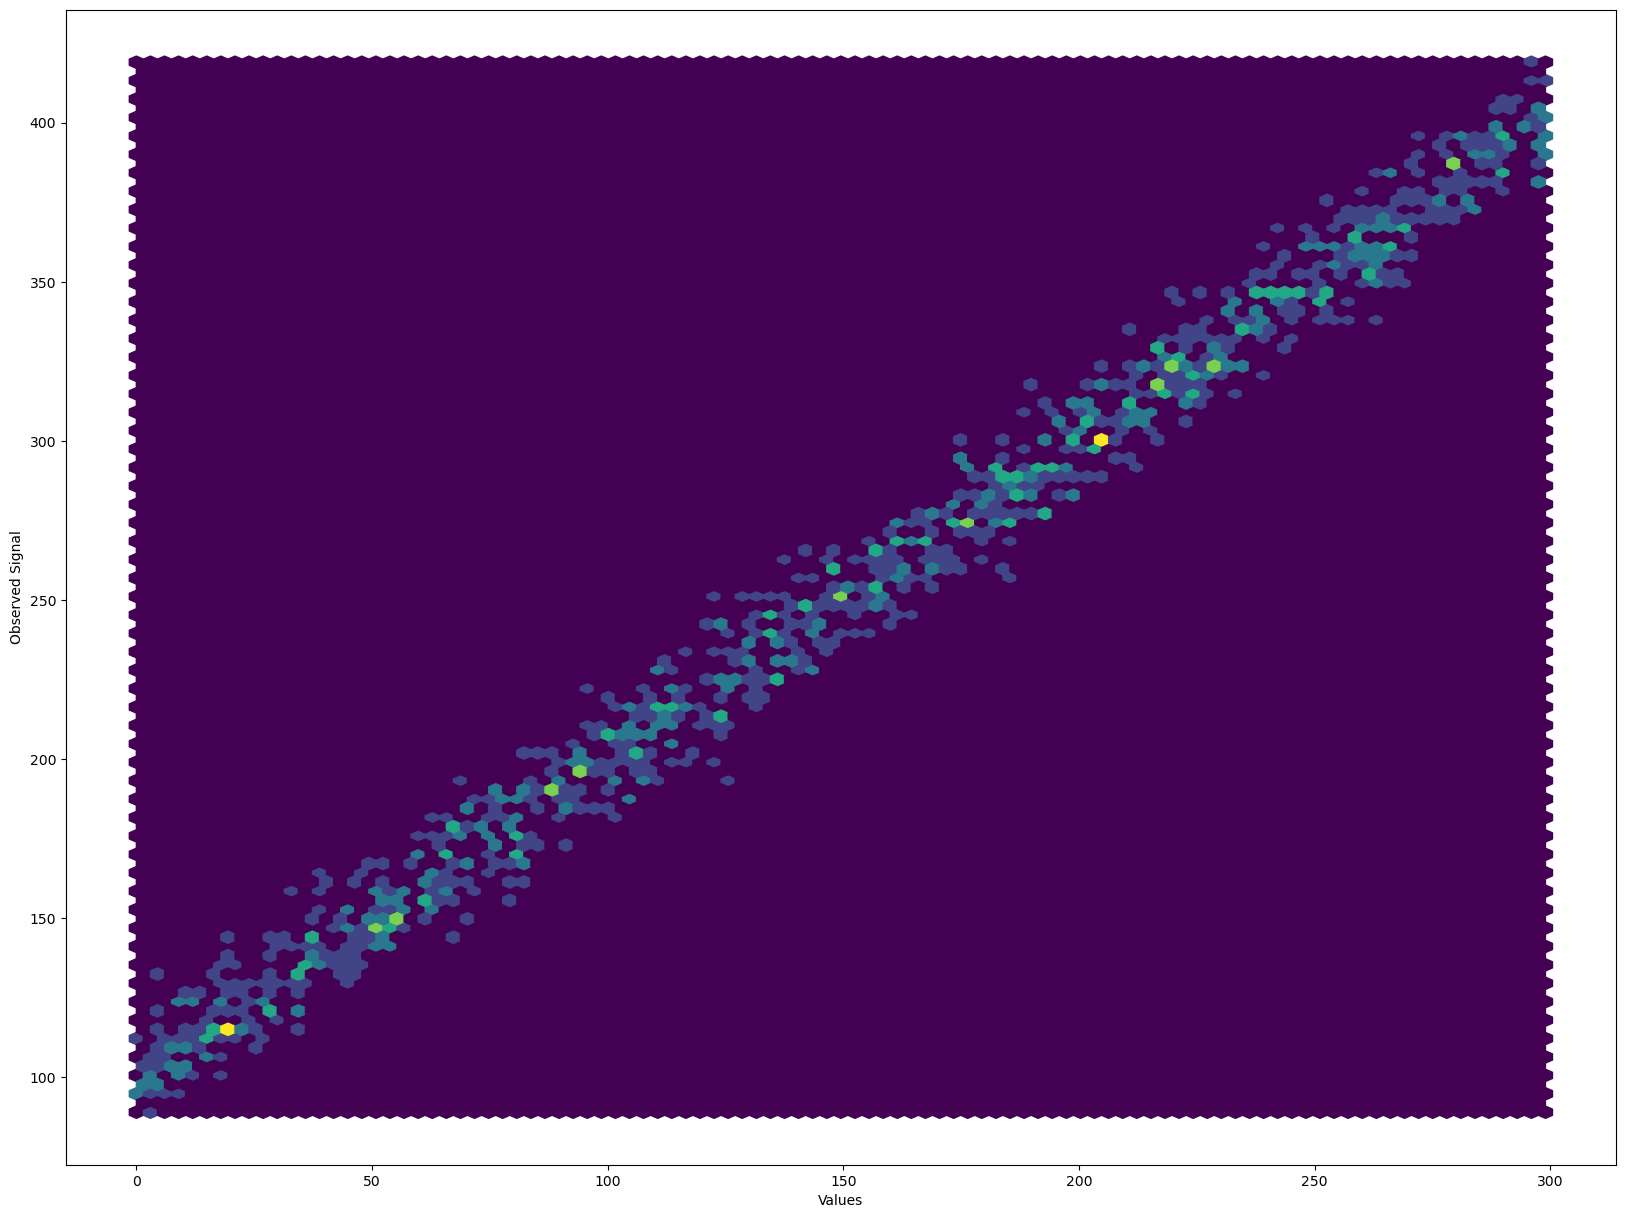

In [48]:
vals = []
for i in range(0,1000):
    vals.append(np.random.randint(0,high=300))
bkgd_inj = []
for i in range(0,1000):
    newDistVal=dist[i]+vals[i]
    bkgd_inj.append(newDistVal)
fig, ax = plt.subplots(1, 1, figsize=(20,15))
plt.hexbin(vals,bkgd_inj)
plt.xlabel("Values")
plt.ylabel("Observed Signal")
plt.show()

When using the data in problem 2, we obtain the above graph which shows the similar result. We need to notice because we are choosing the range to be 0 to 300, in order to find the data such as location of 193 in problem 2, we need to add 100 as the mean and to find the intended data at 293.
#### c)

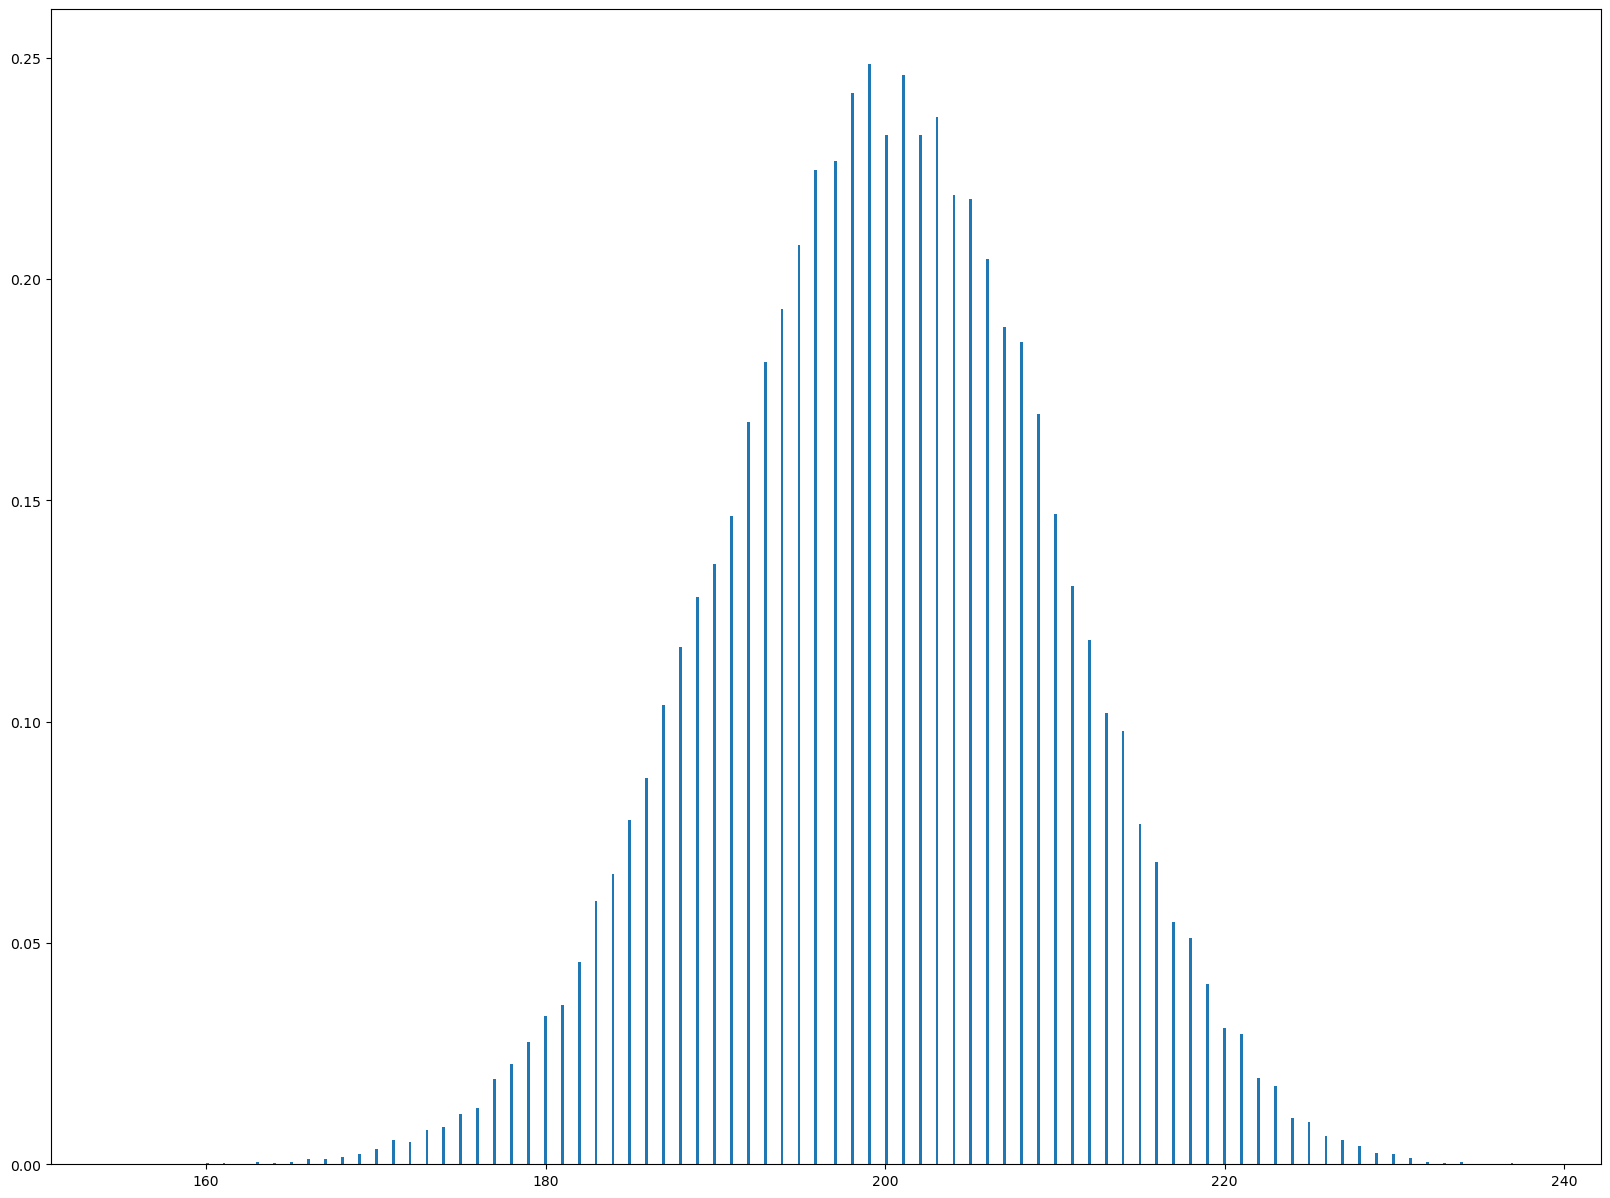

In [50]:
obs = [300]*50000
noise = np.random.poisson(100, 50000)
inject = obs - noise
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(inject,bins=500, density=True)
plt.show()

The above graph is the injected data without the background for the observed value to be 300. Because we have a mean of 100, the actual ean of the distribution is at 200.
#### d)

In [61]:
prob = poisson.cdf(214, 200)
det = stats.norm.ppf(prob)
det

1.0249290829677475

In [64]:
prob = poisson.cdf(185, 200)
det = stats.norm.ppf(prob)
det

-1.0261440170048546

Therefore, we have our 1 sigma signal at the threshold of 214 for upper bound and 185 for lower bound.
#### e)
The answer in part d is non-symmetrical which the lower bound is further away from the mean of 200. It make sense because after all, no matter how likely it looks like normal distribution, it is poisson distribution in its core. Because poisson distribution generally have a larger tail to the right of the mean as the result of log, we should have the upper ob